<a href="https://www.kaggle.com/code/quratulain20/multiple-linear-regression?scriptVersionId=192439501" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df = pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.shape

(10000, 6)

In [6]:
df = df.drop(columns=['Extracurricular Activities'])

In [7]:
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0
...,...,...,...,...,...
9995,1,49,4,2,23.0
9996,7,64,8,5,58.0
9997,6,83,8,5,74.0
9998,9,97,7,0,95.0


<Figure size 1200x800 with 0 Axes>

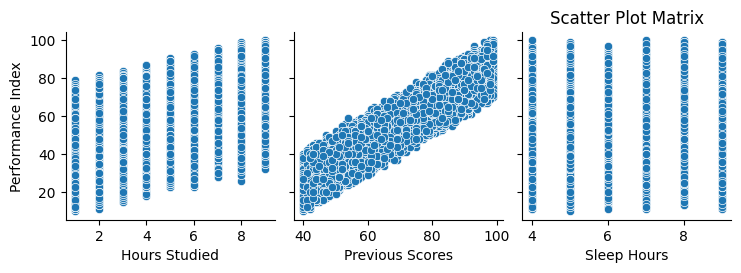

In [8]:
X = df.iloc[:,0:3] # Independent variables
y = df.iloc[:,-1]  # Dependent variable

# Scatter plot matrix
plt.figure(figsize=(12, 8))
sns.pairplot(df, x_vars=X.columns, y_vars=['Performance Index'])
plt.title('Scatter Plot Matrix')
plt.show()

In [9]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [10]:
fig = px.scatter_3d(df, x ='Hours Studied', y= 'Previous Scores', z ='Performance Index' )
fig.show()

In [11]:
fig = px.scatter_3d(
    df,
    x='Hours Studied',
    y='Previous Scores',
    z='Performance Index',
    color='Sleep Hours',
    size='Sample Question Papers Practiced'
)

fig.update_layout(
    scene=dict(
        xaxis_title='Hours Studied',
        yaxis_title='Previous Scores',
        zaxis_title='Performance Index'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.show()

# Multiple Linear Regression using scikit learn library

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = 0.2, random_state = 3)

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [14]:
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred = lr.predict(X_test)

In [16]:
y_pred , y_test

(array([74.25945748, 61.95290101, 15.12246088, ..., 26.19358322,
        63.71280959, 35.95698241]),
 5876    73.0
 6555    63.0
 1448    14.0
 3351    30.0
 231     88.0
         ... 
 869     66.0
 2928    90.0
 8436    28.0
 6312    65.0
 7195    38.0
 Name: Performance Index, Length: 2000, dtype: float64)

In [17]:
# Create the data frame
y_df= pd.DataFrame({
    'Predicted': y_pred,
    'Actual': y_test
})

print(y_df)

      Predicted  Actual
5876  74.259457    73.0
6555  61.952901    63.0
1448  15.122461    14.0
3351  29.961116    30.0
231   88.998817    88.0
...         ...     ...
869   64.534124    66.0
2928  89.808024    90.0
8436  26.193583    28.0
6312  63.712810    65.0
7195  35.956982    38.0

[2000 rows x 2 columns]


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score

In [19]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 4.658230169920074
Mean Absolute Error (MAE): 1.7209110532204246
R-squared (R2) Score: 0.9874835209203159


In [20]:
lr.coef_

array([2.85902963, 1.01885777, 0.47535061])

In [21]:
lr.intercept_

-32.90534796732469

# Multiple linear Regression using our own code

In [22]:
X_train = pd.DataFrame(X_train)

In [23]:
X_train = X = X_train.to_numpy()


In [24]:
X_train

array([[ 3, 91,  6],
       [ 4, 43,  9],
       [ 2, 97,  9],
       ...,
       [ 4, 52,  5],
       [ 3, 86,  6],
       [ 9, 69,  6]])

In [25]:
X_train.shape

(8000, 3)

In [26]:
class Multiple_Linear_Regression:
    
    def __init__(self):
        self.coef = None
        self.intercept = None
        
    def fit (self , X_train ,y_train):
        X_train = np.insert(X_train , 0 , 1 , axis=1) # to insert 1 before X_train column
        
        # coefficient calculation
        beta = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        # extracting coefficient and intercept
        
        self.intercept = beta[0]
        self.coef = beta[1:]
    def predict(self ,X_test):
        y_pred = np.dot(X_test,self.coef) + self.intercept
        return y_pred

In [27]:
mlr = Multiple_Linear_Regression()


In [28]:
mlr.fit(X_train, y_train)

In [29]:
mlr.predict(X_test)

array([74.25945748, 61.95290101, 15.12246088, ..., 26.19358322,
       63.71280959, 35.95698241])

In [30]:
y_pred

array([74.25945748, 61.95290101, 15.12246088, ..., 26.19358322,
       63.71280959, 35.95698241])

In [31]:
X_test.shape

(2000, 3)

In [32]:
r2 = r2_score(y_test, y_pred)
print("r2 score is :" ,r2)

r2 score is : 0.9874835209203159
